In [2]:
# Importing the necessary libraries to  be used inthe project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Loading the Titanic dataset to be used in the task
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

In [4]:
# Displaying the first few rows of the dataset to see its appearance
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [6]:
# Displaying the basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
# Displaying summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe(include='all'))


Summary statistics of the dataset:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       Si

In [10]:
# Data Preprocessing
# Handling the missing values
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data = data.drop(columns=['Cabin'])

In [12]:
# Encoding categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [14]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Model building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Model prediction
y_pred = model.predict(X_test)

In [18]:
# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 81.56%
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [20]:
# Feature importance in the model.
feature_importances = pd.DataFrame(model.feature_importances_, index=features, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

          importance
Sex         0.270886
Fare        0.263350
Age         0.249570
Pclass      0.087436
SibSp       0.053531
Parch       0.040991
Embarked    0.034237


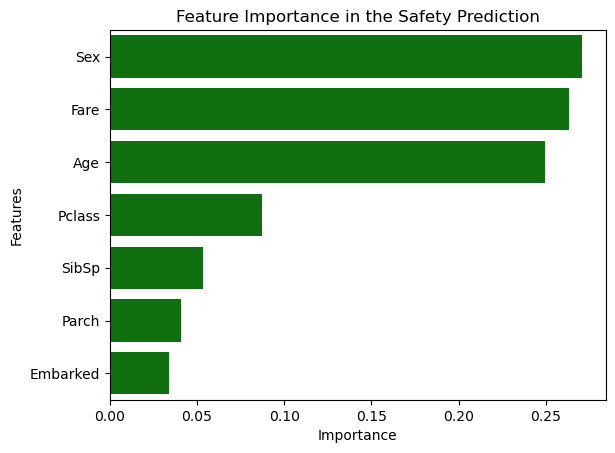

In [22]:
## Visualization of the feature importance in the predictive model using barplot
sns.barplot(x=feature_importances.importance, y=feature_importances.index, color='green')
plt.title('Feature Importance in the Safety Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

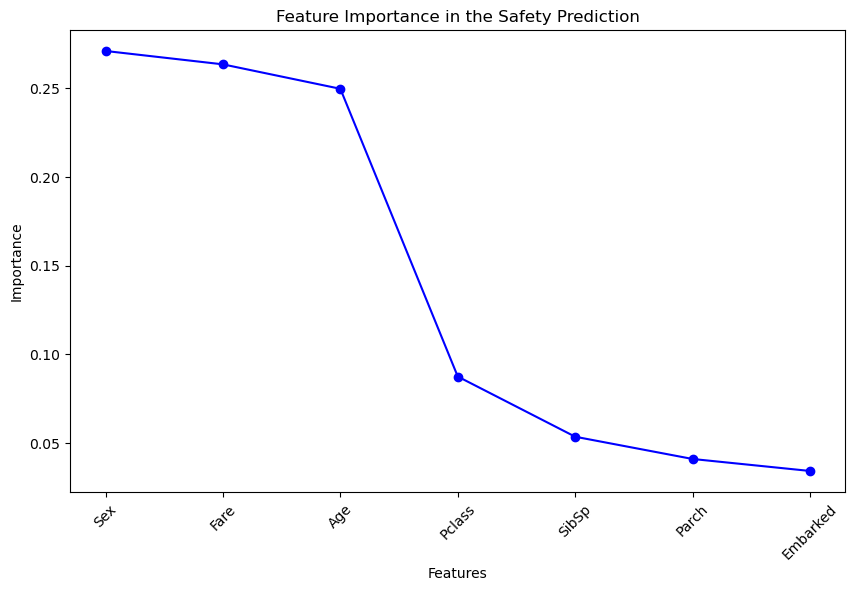

In [24]:
# Visualiation of the feature importance using Line Graph
plt.figure(figsize=(10, 6))
plt.plot(feature_importances.index, feature_importances.importance, marker='o', linestyle='-', color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in the Safety Prediction')
plt.xticks(rotation=45)
plt.show()

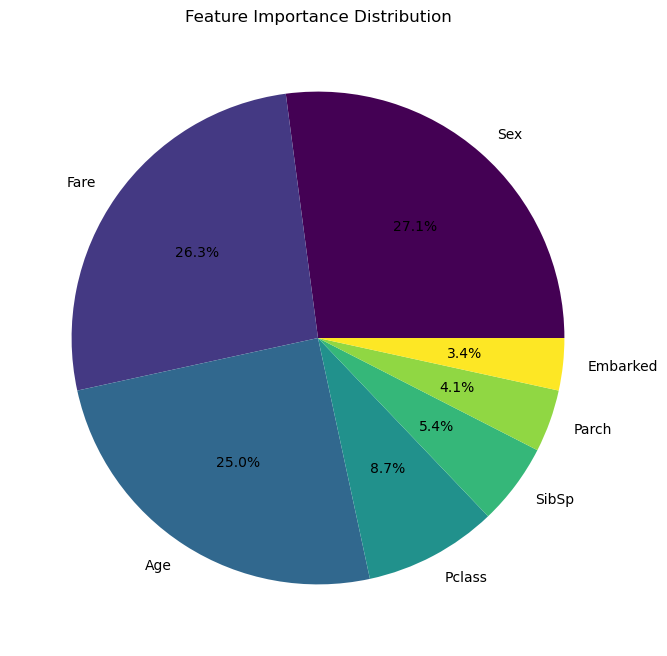

In [26]:
# Visualiation of the feature importance using pie chart.
plt.figure(figsize=(8, 8))
plt.pie(feature_importances.importance, labels=feature_importances.index, autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(feature_importances))))
plt.title('Feature Importance Distribution')
plt.show()